In [1]:
from __future__ import division, print_function

from IPython.core.display import HTML, Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Joins & Pandas

### Agenda:

<h4>
- &nbsp; Concat <br><br>
- &nbsp; Left Join <br><br>
- &nbsp; Right Join <br><br>
- &nbsp; Inner Join <br><br>
- &nbsp; Outer Join <br><br>
- &nbsp; Group By <br><br>
<h4>


## We have already discussed how to concat strings

In [2]:
x = "This is a string!" 
y = "This is also a string!"
z = "This is an illusion!"

```python
x = "This is a string!"
y = "This is also a string!"
z = "This is an illusion!"
```

In [3]:
x + '  ' + y + ' ' + z + ''

'This is a string!  This is also a string! This is an illusion!'

```python
 x + '  ' + y + ' ' + y + ''
 
'This is a string!  This is also a string! This is an illusion!'
```

## We saw that works for tuple and lists as well...

In [4]:
my_tups = (1,2,3)
my_extra_tups = (4,5,6)

my_tups + my_extra_tups

(1, 2, 3, 4, 5, 6)

In [5]:
my_list = ['a', 'b', 'c']
my_other_list = ['d', 'e', 'f']

my_list + my_other_list

['a', 'b', 'c', 'd', 'e', 'f']

## So naturally, that will work for DataFrames and Series, right?

In [6]:
my_series = pd.Series([1,2,3])
my_other_series = pd.Series([4,5,6])

my_series + my_other_series

0    5
1    7
2    9
dtype: int64

In [7]:
Image(url='https://media.giphy.com/media/7p3e2WCM0VEnm/giphy.gif')

### <ul><ul> #Nope

## But how do we concat Series and DataFrames?

  ## Let's create a DataFrame

In [8]:
ab_dict = {'names': ['Alma', 'Anthony', 'Ava', 'Barry', 'Brick', 'Betty'],
          'letter_grades': ['A', 'A', 'A', 'B', 'B', 'B'],
          'number_grades': [100, 95, 93, 88, 87, 89]
          }

ab_students = pd.DataFrame(ab_dict)

In [9]:
ab_students

,letter_grades,names,number_grades
0,A,Alma,100
1,A,Anthony,95
2,A,Ava,93
3,B,Barry,88
4,B,Brick,87
5,B,Betty,89


## Set the name as the index

In [10]:
ab_students.set_index('names', inplace=1)
ab_students

,letter_grades,number_grades
names,,
Alma,A,100
Anthony,A,95
Ava,A,93
Barry,B,88
Brick,B,87
Betty,B,89


## Let's create another

In [11]:
cd_dict = {'names': ['Cam', 'Caroly', 'Cathy', 'David', 'Darius', 'Dipsy'],
          'letter_grades': ['C', 'C', 'C', 'D', 'D', 'D'],
          'number_grades': [79, 79, 76, 69, 66, 68]
          }

cd_students = pd.DataFrame(cd_dict)

In [12]:
cd_students

,letter_grades,names,number_grades
0,C,Cam,79
1,C,Caroly,79
2,C,Cathy,76
3,D,David,69
4,D,Darius,66
5,D,Dipsy,68


## Set the name as the index

In [13]:
cd_students.set_index('names', inplace=1)
cd_students

,letter_grades,number_grades
names,,
Cam,C,79
Caroly,C,79
Cathy,C,76
David,D,69
Darius,D,66
Dipsy,D,68


## Time to concat!

```python
pd.concat([ab_students, cd_students])
```

In [14]:
pd.concat([ab_students, cd_students])

,letter_grades,number_grades
names,,
Alma,A,100
Anthony,A,95
Ava,A,93
Barry,B,88
Brick,B,87
Betty,B,89
Cam,C,79
Caroly,C,79
Cathy,C,76


## Let's look at a visualization of this...

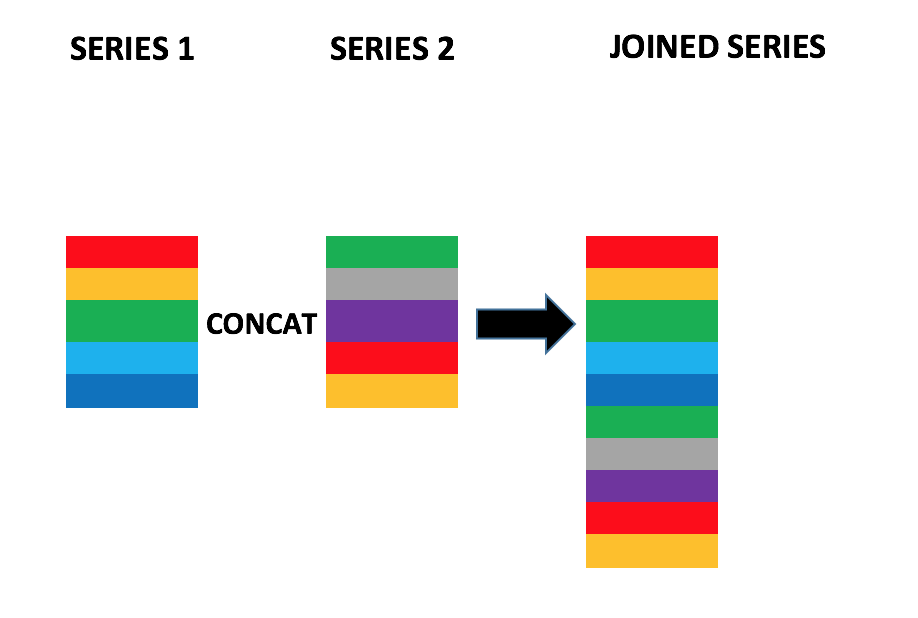

In [15]:
from IPython.core.display import Image
Image('../assets/images/concat_tetris.png', height=600, width=600)

## E1. Concatenate the two data frames

In [16]:
states_am = pd.read_csv('../assets/data/us_states_am.csv')
states_nz = pd.read_csv('../assets/data/us_states_nz.csv')

In [17]:
len(states_am)

26

In [18]:
len(states_nz)

24

## We can set "ignore_index=True" to keep from having to reset it

## We can also concat along columns by setting axis=1

In [21]:
pd.concat([states_am, states_nz], axis=1)

,name,abbreviation,name,abbreviation
0,Alabama,AL,Nebraska,NE
1,Alaska,AK,Nevada,NV
2,Arizona,AZ,New Hampshire,NH
3,Arkansas,AR,New Jersey,NJ
4,California,CA,New Mexico,NM
5,Colorado,CO,New York,NY
6,Connecticut,CT,North Carolina,NC
7,Delaware,DE,North Dakota,ND
8,Florida,FL,Ohio,OH
9,Georgia,GA,Oklahoma,OK


## <ul>Concats horizontally

## Why do this?

## <ul> No good reason really...maybe presentation?

## <ul><ul> Let's take a look at that..

In [22]:
a_states = states_am[states_am['name'].str.startswith('A')]\
            .reset_index(drop=1)

c_states = states_am[states_am['name'].str.startswith('C')]\
            .reset_index(drop=1)

In [23]:
a_states

,name,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR


In [24]:
c_states

,name,abbreviation
0,California,CA
1,Colorado,CO
2,Connecticut,CT


In [25]:
pd.concat([a_states, c_states], axis=1, keys=['A States','C States'])

A States                  C States             
       name abbreviation         name abbreviation
0   Alabama           AL   California           CA
1    Alaska           AK     Colorado           CO
2   Arizona           AZ  Connecticut           CT
3  Arkansas           AR          NaN          NaN

## The "keys" parameter will allow you to have specified names for each sub-frame

# Let's talk about joins.

## <ul> Q: Who has worked with SQL joins?

## Joins

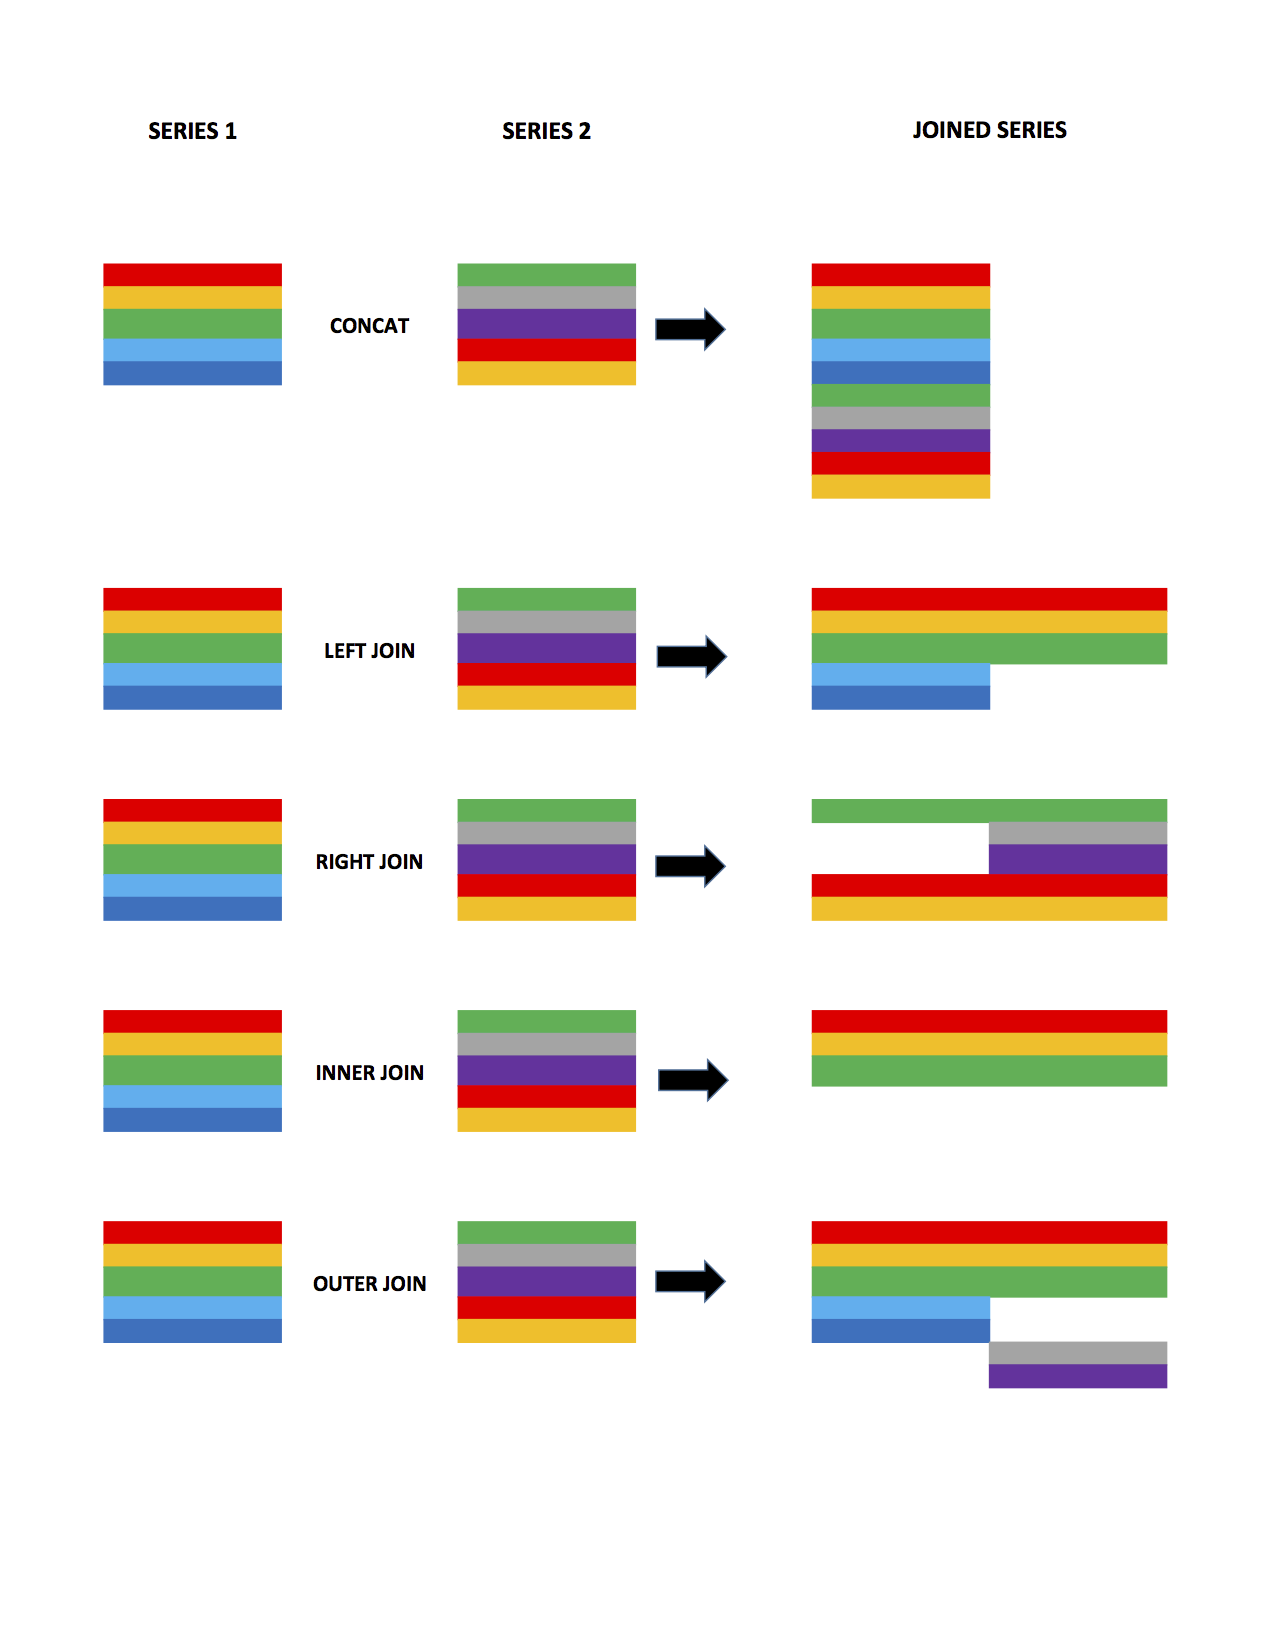

In [26]:
Image('../assets/images/join_tetris.png', height=700, width=600)

# Let's look at pd.merge()

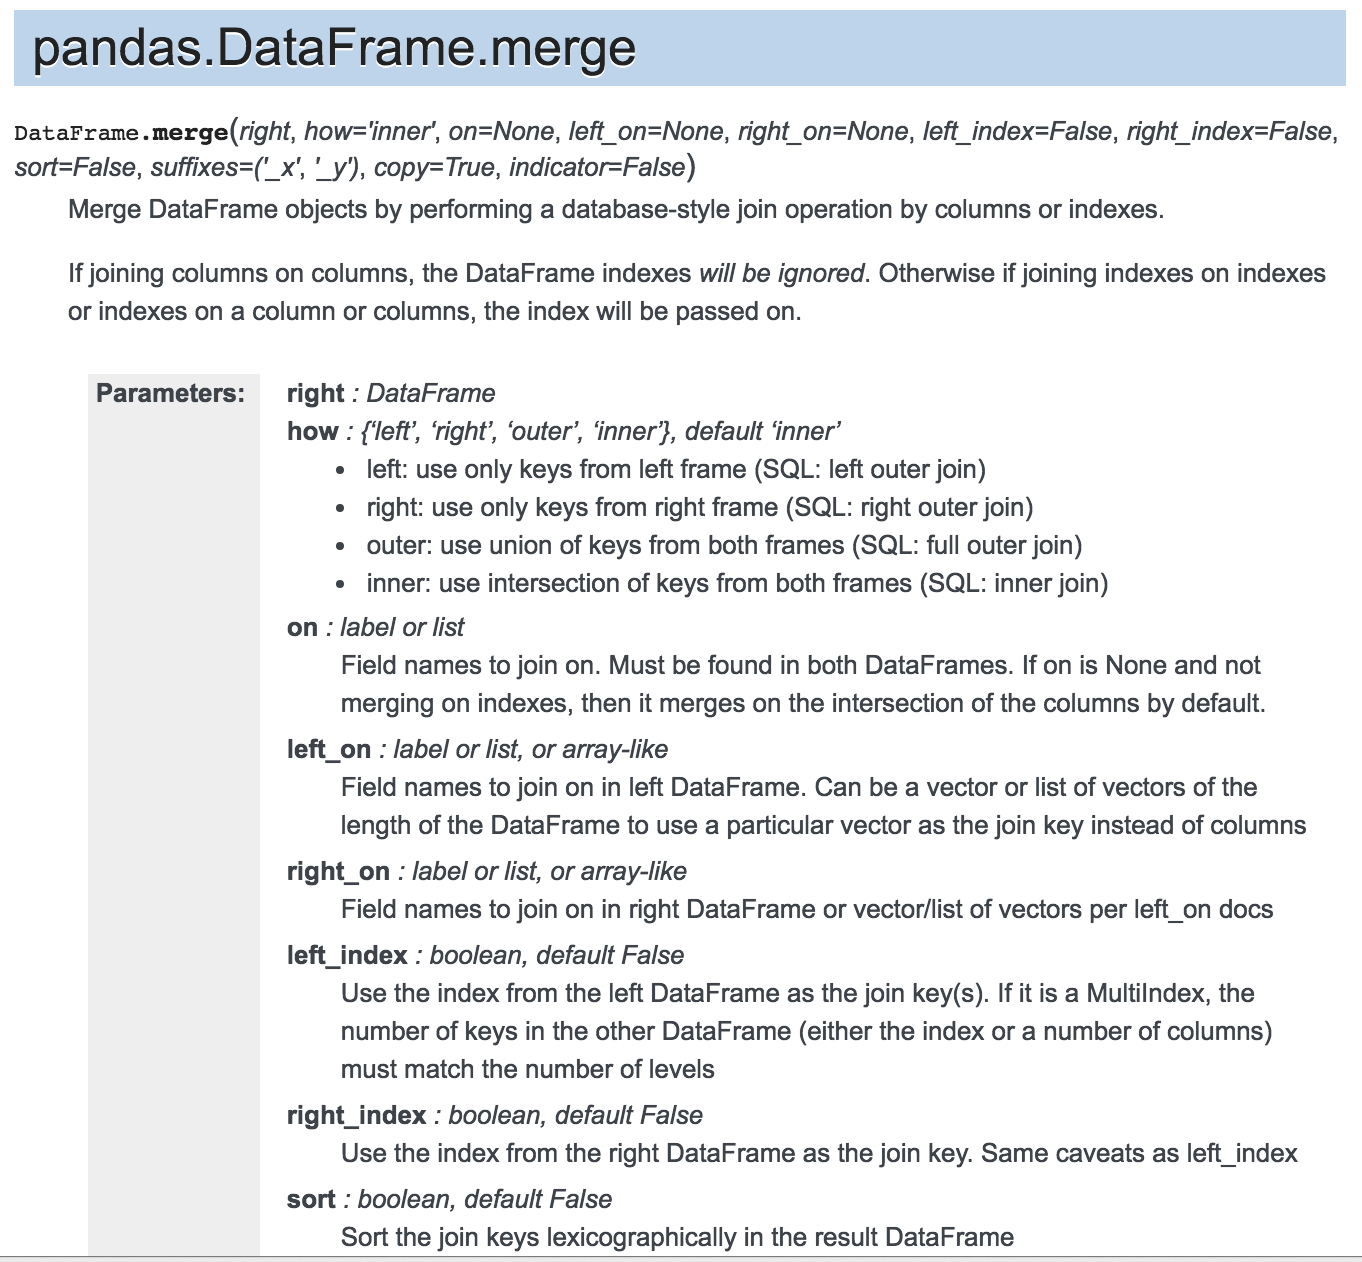

In [27]:
Image('../assets/images/merge.png', width=700)

## The Default Join - Inner Join

In [28]:
states = pd.read_csv('../assets/data/us_states.csv')

capitals = pd.read_csv('../assets/data/capitals.csv')

In [29]:
states_0_to_10 = states[0:11]

capitals_5_to_15 = capitals[5:16]

In [30]:
states_0_to_10

,name,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [31]:
capitals_5_to_15

,name,description,latitude,longitude
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296
10,Georgia,Atlanta<br>,33.749027,-84.388229
11,Idaho,Boise,43.617775,-116.199722
12,Illinois,Springfield,39.798363,-89.654961
13,Indiana,Indianapolis,39.768623,-86.162643
14,Iowa,Des Moines,41.591087,-93.603729


## Syntax Option 1: 
## Merge using pd.merge()

In [32]:
pd.merge(states_0_to_10, capitals_5_to_15)

,name,abbreviation,description,latitude,longitude
0,Colorado,CO,Denver,39.739227,-104.984856
1,Connecticut,CT,Hartford<br>,41.764046,-72.682198
2,Delaware,DE,Dover,39.157307,-75.519722
3,Florida,FL,Tallahassee,30.438118,-84.281296
4,Georgia,GA,Atlanta<br>,33.749027,-84.388229
5,Hawaii,HI,Honolulu,21.307442,-157.857376


## Syntax Option 2: 
## Merge using left_df.merge(right_df)

In [33]:
states_0_to_10.merge(capitals_5_to_15)

,name,abbreviation,description,latitude,longitude
0,Colorado,CO,Denver,39.739227,-104.984856
1,Connecticut,CT,Hartford<br>,41.764046,-72.682198
2,Delaware,DE,Dover,39.157307,-75.519722
3,Florida,FL,Tallahassee,30.438118,-84.281296
4,Georgia,GA,Atlanta<br>,33.749027,-84.388229
5,Hawaii,HI,Honolulu,21.307442,-157.857376


## Inner Join

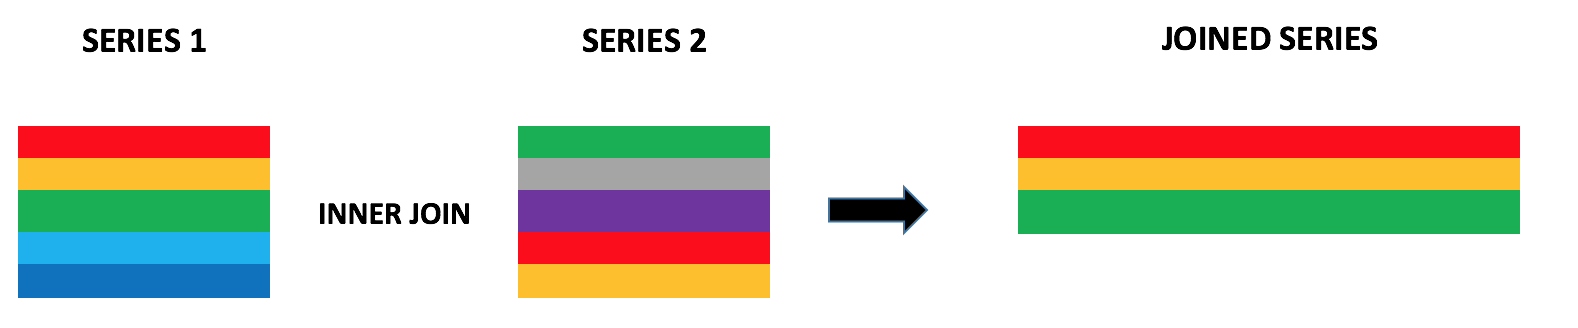

In [34]:
Image('../assets/images/inner_join.png')

## Left Joins

In [35]:
pd.merge(states_0_to_10, capitals_5_to_15, how='left')

,name,abbreviation,description,latitude,longitude
0,Alabama,AL,NaN,NaN,NaN
1,Alaska,AK,NaN,NaN,NaN
2,Arizona,AZ,NaN,NaN,NaN
3,Arkansas,AR,NaN,NaN,NaN
4,California,CA,NaN,NaN,NaN
5,Colorado,CO,Denver,39.739227,-104.984856
6,Connecticut,CT,Hartford<br>,41.764046,-72.682198
7,Delaware,DE,Dover,39.157307,-75.519722
8,Florida,FL,Tallahassee,30.438118,-84.281296
9,Georgia,GA,Atlanta<br>,33.749027,-84.388229


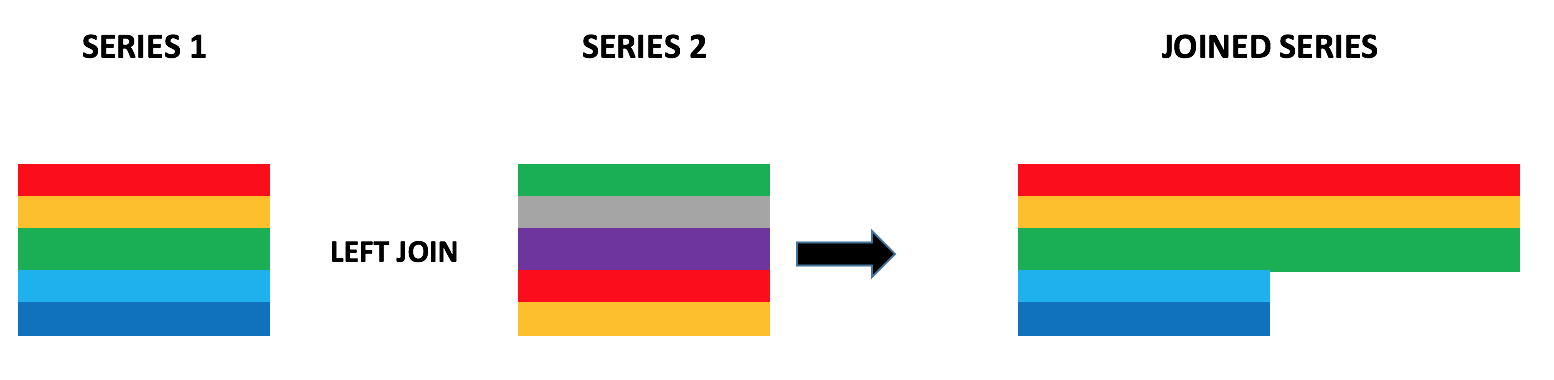

In [36]:
Image('../assets/images/left_join.png')

## Right Joins

In [37]:
pd.merge(states_0_to_10, capitals_5_to_15, how='right')

,name,abbreviation,description,latitude,longitude
0,Colorado,CO,Denver,39.739227,-104.984856
1,Connecticut,CT,Hartford<br>,41.764046,-72.682198
2,Delaware,DE,Dover,39.157307,-75.519722
3,Florida,FL,Tallahassee,30.438118,-84.281296
4,Georgia,GA,Atlanta<br>,33.749027,-84.388229
5,Hawaii,HI,Honolulu,21.307442,-157.857376
6,Idaho,NaN,Boise,43.617775,-116.199722
7,Illinois,NaN,Springfield,39.798363,-89.654961
8,Indiana,NaN,Indianapolis,39.768623,-86.162643
9,Iowa,NaN,Des Moines,41.591087,-93.603729


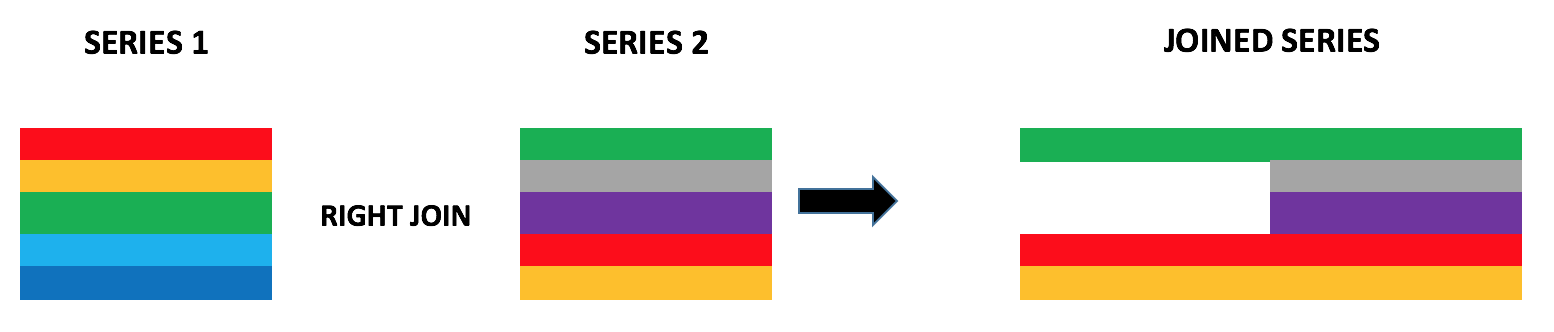

In [38]:
Image('../assets/images/right_join.png')

## Outer Join

In [39]:
pd.merge(states_0_to_10, capitals_5_to_15, how='outer')

,name,abbreviation,description,latitude,longitude
0,Alabama,AL,NaN,NaN,NaN
1,Alaska,AK,NaN,NaN,NaN
2,Arizona,AZ,NaN,NaN,NaN
3,Arkansas,AR,NaN,NaN,NaN
4,California,CA,NaN,NaN,NaN
5,Colorado,CO,Denver,39.739227,-104.984856
6,Connecticut,CT,Hartford<br>,41.764046,-72.682198
7,Delaware,DE,Dover,39.157307,-75.519722
8,Florida,FL,Tallahassee,30.438118,-84.281296
9,Georgia,GA,Atlanta<br>,33.749027,-84.388229


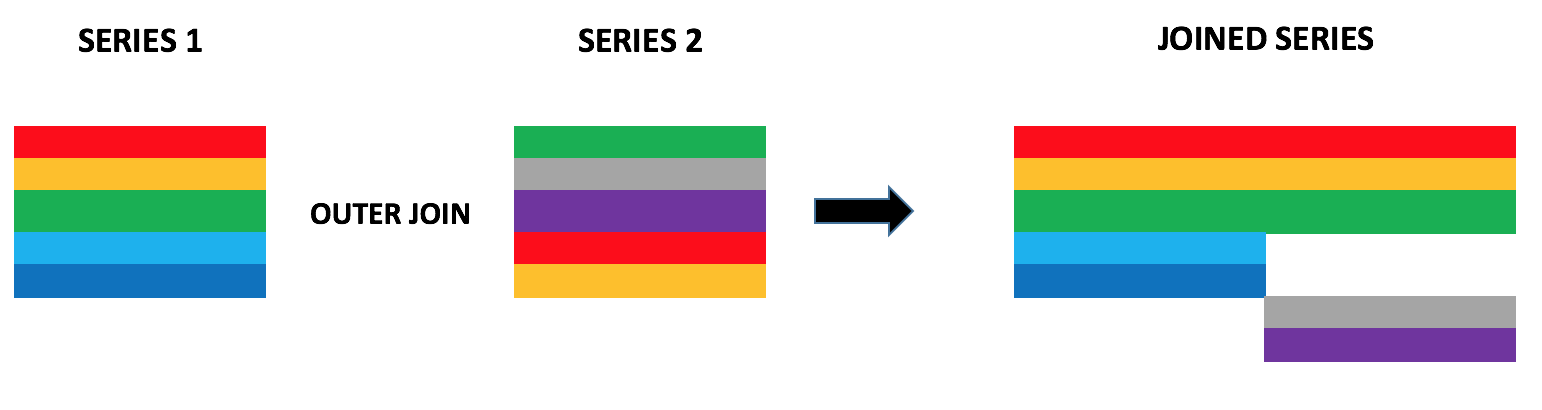

In [40]:
Image('../assets/images/outer_join.png')

## Groupby!

## The syntax:
## df.groupby('series_a')['series_b'].some_func()

## Let's get a series of the first letters of each state

In [41]:
st_letters = states['name'].apply(lambda x: x[0])

In [42]:
st_letters

0     A
1     A
2     A
3     A
4     C
5     C
6     C
7     D
8     F
9     G
10    H
11    I
12    I
13    I
14    I
15    K
16    K
17    L
18    M
19    M
20    M
21    M
22    M
23    M
24    M
25    M
26    N
27    N
28    N
29    N
30    N
31    N
32    N
33    N
34    O
35    O
36    O
37    P
38    R
39    S
40    S
41    T
42    T
43    U
44    V
45    V
46    W
47    W
48    W
49    W
Name: name, dtype: object

## Let's get a series with the length of their names

In [43]:
st_len = states['name'].apply(lambda x: len(x))

In [44]:
st_len

0      7
1      6
2      7
3      8
4     10
5      8
6     11
7      8
8      7
9      7
10     6
11     5
12     8
13     7
14     4
15     6
16     8
17     9
18     5
19     8
20    13
21     8
22     9
23    11
24     8
25     7
26     8
27     6
28    13
29    10
30    10
31     8
32    14
33    12
34     4
35     8
36     6
37    12
38    12
39    14
40    12
41     9
42     5
43     4
44     7
45     8
46    10
47    13
48     9
49     7
Name: name, dtype: int64

## Now we have a DataFrame with the first letter and number of characters in each states name

In [45]:
st_stuff = pd.concat([st_letters, st_len], keys=['letter', 'length'], axis=1)
st_stuff

,letter,length
0,A,7
1,A,6
2,A,7
3,A,8
4,C,10
5,C,8
6,C,11
7,D,8
8,F,7
9,G,7


## We can Use groupby to get the average length of the states names by letter

In [46]:
st_stuff.groupby('letter')['length'].mean()\
                                    .to_frame('avg_length')

,avg_length
letter,
A,7.000000
C,9.666667
D,8.000000
F,7.000000
G,7.000000
H,6.000000
I,6.000000
K,7.000000
L,9.000000


## Using groupby to find the median length

In [47]:
st_stuff.groupby('letter')['length'].median()\
                                    .to_frame('med_length')

,med_length
letter,
A,7.0
C,10.0
D,8.0
F,7.0
G,7.0
H,6.0
I,6.0
K,7.0
L,9.0


## Using groupby to find the max and the min

In [48]:
st_stuff.groupby('letter')['length'].agg([np.max, np.min])

,amax,amin
letter,,
A,8,6
C,11,8
D,8,8
F,7,7
G,7,7
H,6,6
I,8,4
K,8,6
L,9,9


### <ul> uses an aggregation function just like .pivot_table()

## E2. Use groupby to get the count of each letter
## save it as gbcf make sure to use .to_frame('gb_count')

## E3. Confirm your results using .value_counts() and save as vcf make sure to use .to_frame('val_count')

## E4. Super confirm it by joining the last two frames you built

## <ul> \*hint* be mindful of your indicies!

## Finally, we merge!

## \*Bonus: use .apply() with a lambda func<br>to make sure the two equal to 0 when subtracted


## E2. Practicing Joins and Group by

##### Scenario: we have a list of students who took a test. Some took it once, some took it multiple times, some didn't take it at all.
###### Some forgot to put their name on the test.
- Use the three data frames in the notebook below
- First, concatenate df_a and df_b
- Save that new frame as df_c
- Left join df_a and df_n
- Right join df_a and df_n
- Left join df_b to df_n
- Right join df_b to df_n
- Outer join df_c to df_n
- Save that as grade_table
- Use .groupby() to get a count of how many times each student_id took the test
- Join that with df_c to get the names of each student
- Save that as final_table
- Sort the final table by the student id in ascending order
- Bonus: using first and last name only do a group by to get the avg score


In [55]:
raw_data = {
        'student_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['student_id', 'first_name', 'last_name'])
df_a

,student_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [56]:
raw_data = {
        'student_id': ['6', '7', '8', '9', '10'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['student_id', 'first_name', 'last_name'])
df_b

,student_id,first_name,last_name
0,6,Billy,Bonder
1,7,Brian,Black
2,8,Bran,Balwner
3,9,Bryce,Brice
4,10,Betty,Btisan


In [57]:
raw_data = {
        'student_id': ['2', '2', '2', '4', '6', '8', '8', '10', '10', '12'],
        'test_score': [72, 75, 86, 61, 96, 84, 95, 91, 61, 76]}
df_n = pd.DataFrame(raw_data, columns = ['student_id','test_score'])
df_n

,student_id,test_score
0,2,72
1,2,75
2,2,86
3,4,61
4,6,96
5,8,84
6,8,95
7,10,91
8,10,61
9,12,76


## Concat df_a to df_b and save it as df_c

## Left join df_a to df_n

### <ul> Notice we get multiples of Amy

## Right join df_a to df_n

### <ul> Notice we only match the df_a students

### <ul>But, we get all the test scores since they were in df_n (right frame)

## Left join df_b to df_n

## Right join df_b to df_n

## Left join df_c to df_n

### <ul> Notice we get all the names with the mutliple tests

## Outer join df_c to df_n

### Notice we have more rows than the one above

## Group the results by student_id to get a count of the number of tests taken

## Join s_count with the student names from df_c save as final_table

## Resetting the index is the key here.

## Sort the data frame by the student id<br>in ascending order

### <ul> Have to check the data type!

### <ul> Now it works!

## Use groupby to get the avg. score for each first and last name pair in grade_table